# Importing images & making binary masks

In [1]:
from PIL import Image, ImageFilter
from PIL import _imagingmorph
import requests
from io import BytesIO
%matplotlib inline 
from matplotlib import pyplot as plt
from scipy.ndimage import measurements,morphology

In [2]:
import cv2 as cv2
import numpy as np

In [3]:
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-1-638.jpg?cb=1367504074")
p1 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-2-638.jpg?cb=1367504074")
p2 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-3-638.jpg?cb=1367504074")
p3 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-4-638.jpg?cb=1367504074")
p4 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-5-638.jpg?cb=1367504074")
p5 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-6-638.jpg?cb=1367504074")
p6 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-7-638.jpg?cb=1367504074")
p7 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-8-638.jpg?cb=1367504074")
p8 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-9-638.jpg?cb=1367504074")
p9 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-10-638.jpg?cb=1367504074")
p10 = Image.open(BytesIO(response.content)).convert('L')
response = requests.get("https://image.slidesharecdn.com/pablopicasso-bulls1-11-100728212413-phpapp02/95/pablo-picasso-bulls-111-11-638.jpg?cb=1367504074")
p11 = Image.open(BytesIO(response.content)).convert('L')

In [4]:
ap1 = np.array(p1)
ap2 = np.array(p2)
ap3 = np.array(p3)
ap4 = np.array(p4)
ap5 = np.array(p5)
ap6 = np.array(p6)
ap7 = np.array(p7)
ap8 = np.array(p8)
ap9 = np.array(p9)
ap10 = np.array(p10)
ap11 = np.array(p11)

In [5]:
ret1, bp1 = cv2.threshold(ap1, 120, 255, cv2.THRESH_BINARY)
ibp1 = cv2.bitwise_not(bp1) #invert
ret2, bp2 = cv2.threshold(ap2, 120, 255, cv2.THRESH_BINARY)
ibp2 = cv2.bitwise_not(bp2) #invert
ret3, bp3 = cv2.threshold(ap3, 120, 255, cv2.THRESH_BINARY)
ibp3 = cv2.bitwise_not(bp3) #invert
ret4, bp4 = cv2.threshold(ap4, 120, 255, cv2.THRESH_BINARY)
ibp4 = cv2.bitwise_not(bp4) #invert
ret5, bp5 = cv2.threshold(ap5, 120, 255, cv2.THRESH_BINARY)
ibp5 = cv2.bitwise_not(bp5) #invert
ret6, bp6 = cv2.threshold(ap6, 120, 255, cv2.THRESH_BINARY)
ibp6 = cv2.bitwise_not(bp6) #invert
ret7, bp7 = cv2.threshold(ap7, 120, 255, cv2.THRESH_BINARY)
ibp7 = cv2.bitwise_not(bp7) #invert
ret8, bp8 = cv2.threshold(ap8, 120, 255, cv2.THRESH_BINARY)
ibp8 = cv2.bitwise_not(bp8) #invert
ret9, bp9 = cv2.threshold(ap9, 120, 255, cv2.THRESH_BINARY)
ibp9 = cv2.bitwise_not(bp9) #invert
ret10, bp10 = cv2.threshold(ap10, 120, 255, cv2.THRESH_BINARY)
ibp10 = cv2.bitwise_not(bp10) #invert
ret11, bp11 = cv2.threshold(ap11, 120, 255, cv2.THRESH_BINARY)
ibp11 = cv2.bitwise_not(bp11) #invert

# Trying out morphological operations & different kernels

In [6]:
kernel1 = np.ones((5, 5),np.uint8)
kernel2 = np.ones((2, 2), np.uint8)
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

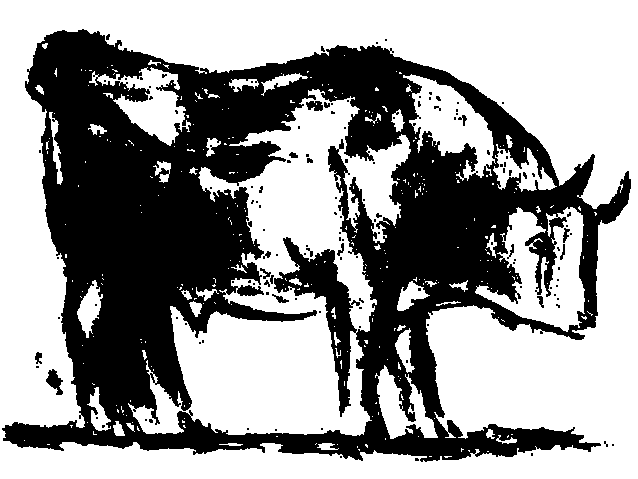

In [7]:
ep1 = cv2.erode(bp1,kernel2,iterations = 1)
ep1 = Image.fromarray(np.uint8(ep1))
ep1 #erosion

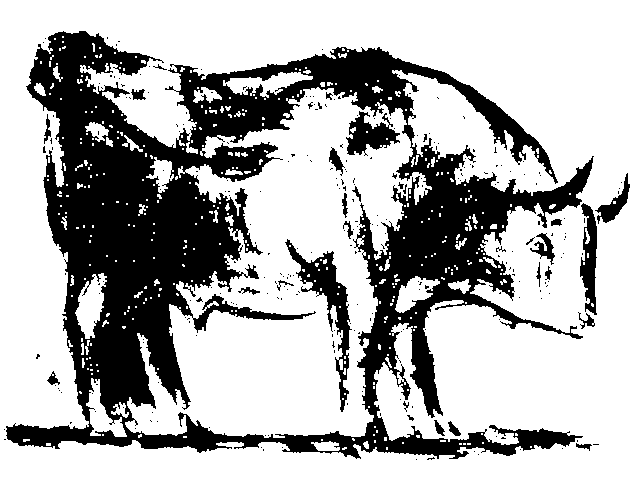

In [8]:
dp1 = cv2.dilate(bp1,kernel2,iterations = 1)
dp1 = Image.fromarray(np.uint8(dp1))
dp1 #dilation

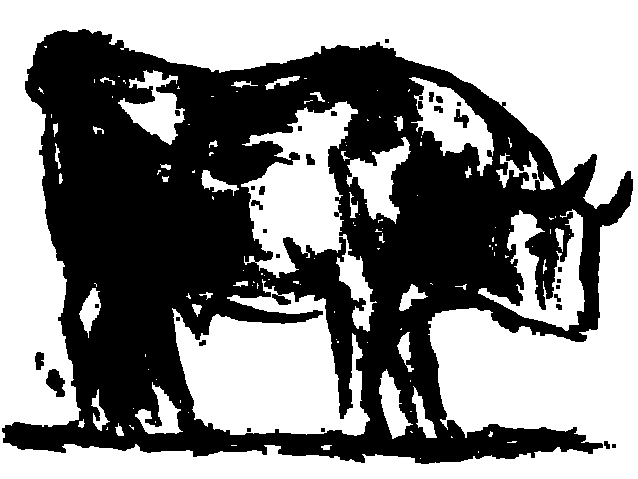

In [8]:
ep1 = cv2.erode(bp1,kernel2,iterations = 3)
ep1 = Image.fromarray(np.uint8(ep1))
ep1

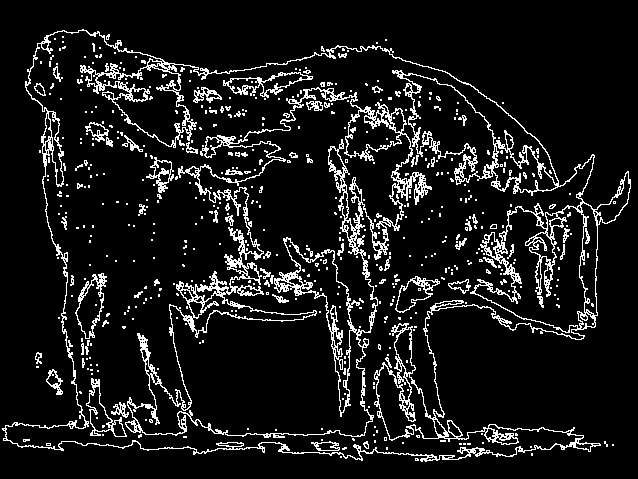

In [9]:
mex1 = cv2.morphologyEx(bp1, cv2.MORPH_GRADIENT, kernel2)
mex1 = Image.fromarray(np.uint8(mex1))
mex1

Next try skeletonization (plate 6):

In [10]:
size = np.size(ibp6)
skel = np.zeros(ibp6.shape,np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while(not done):
    eroded = cv2.erode(ibp6,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(ibp6,temp)
    skel = cv2.bitwise_or(skel,temp)
    ibp6 = eroded.copy()
 
    zeros = size - cv2.countNonZero(ibp6)
    if zeros==size:
        done = True

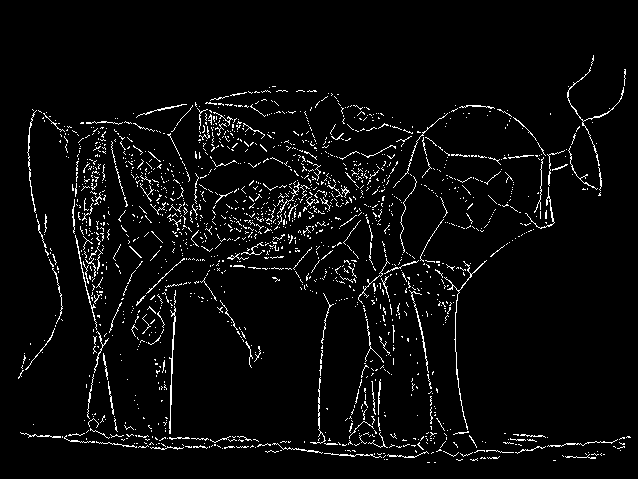

In [11]:
skel6 = skel
Image.fromarray(np.uint8(skel6))

In [14]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_img8 = cv2.morphologyEx(ibp8, cv2.MORPH_GRADIENT, kernel4)

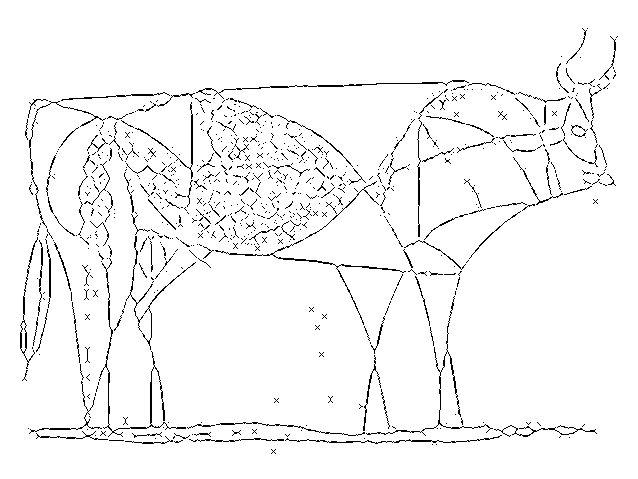

In [140]:
Image.fromarray(np.uint8(cv2.bitwise_not(skel8)))

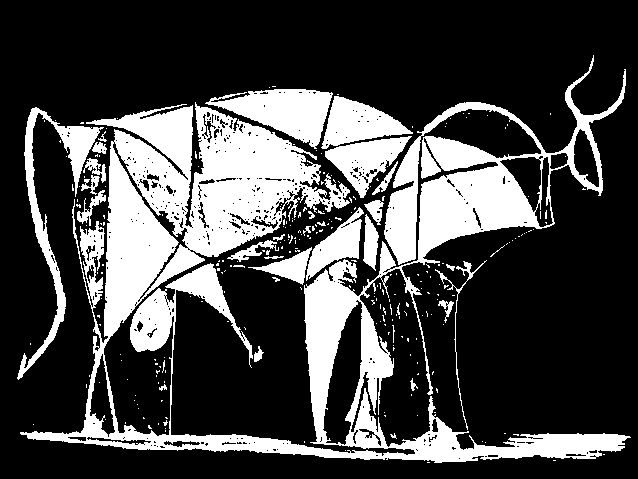

In [17]:
Image.fromarray(np.uint8(ibp6))


# Calculating the differences

The differences in pictures can be computed in the followoing way: make both pictures binary, and perform logical operations to extract added, unchanged and deleted parts. This algorithm will work, as the plates are cropped in such a way that their shapes align and sizes coincide. Following is an example of such a comparison (peroformed only on one tuple, the rest is similar):

## Plate 1 to Plate 2

In [18]:
iunchanged1 = ibp1 & ibp2
ideleted1 = ibp1 & cv2.bitwise_not(ibp2)
iadded1 = cv2.bitwise_not(ibp1) & ibp2

In [19]:
p1_unchanged = Image.fromarray(np.uint8(cv2.bitwise_not(iunchanged1)))
p1_deleted = Image.fromarray(np.uint8(cv2.bitwise_not(ideleted1)))
p1_added = Image.fromarray(np.uint8(cv2.bitwise_not(iadded1)))

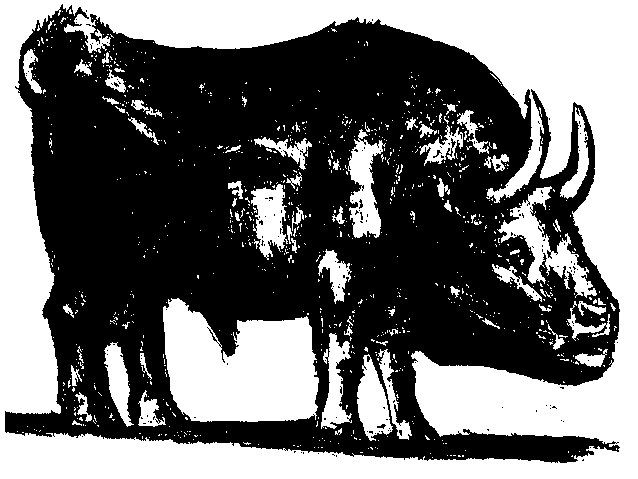

In [20]:
Image.fromarray(np.uint8(cv2.bitwise_not(ibp2)))

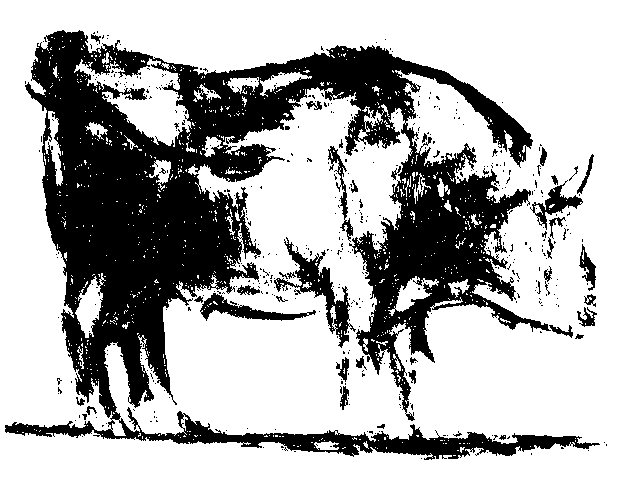

In [21]:
p1_unchanged

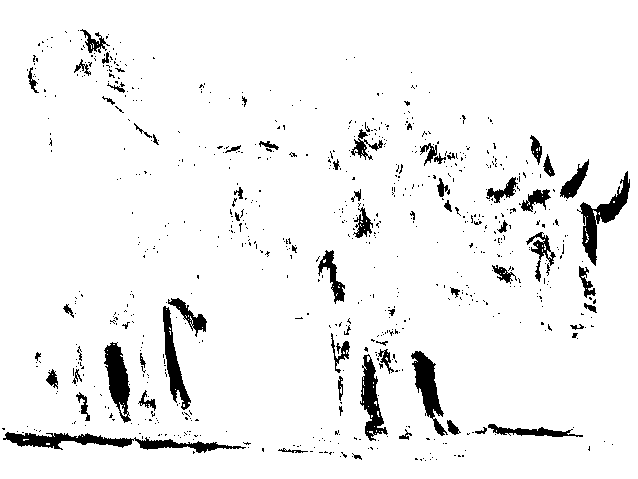

In [28]:
p1_deleted

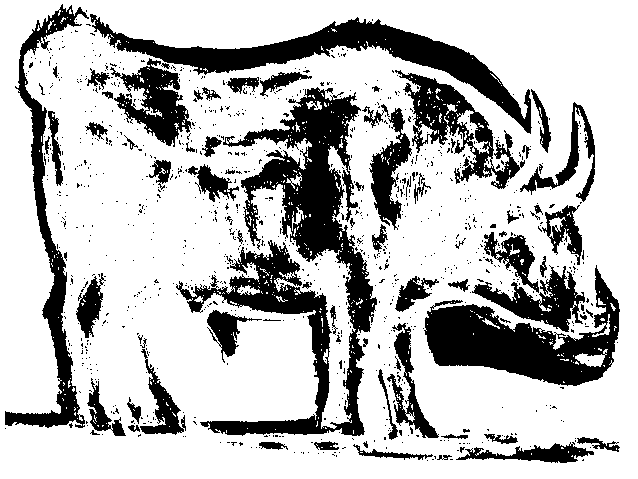

In [22]:
p1_added

## Conceptual definition of possible transofmrations

From plate 1 to plate 2:
According to the results obtained from the binary mask difference, the bull has a much thicker outline and is more shaded on the inside. t has become much more bulkier. This operation can be carried out by doing closing with an appropriate kernel size. More nose structures are added, horns are elevated. 

From plate 2 to plate 3: bulkiness is the same, however contours of muscles and skeleton are now highlighted. The bull has more texture, the plate is brighter. The contours can be found using edge or contour detection algorithms, extracted as white pixels and later added as a mask to the original picture than blur the picture or adjust histogram so that the contrours somewhat blend with the rest.

From plate 3 to plate 4: contours have become more expressed and bright, some of them are not only curves but also straight lines. The head has become flat as if it was projected on some surface. Overall the contrast of the image has become larger. The face part can be implemented as detecting the contours of the nose, selecting them and scaling them to fit the next plate.
In terms of binary mask it looks like a layer of contours has been removed as follows:

In [23]:
iunchanged3 = ibp3 & ibp4
ideleted3= ibp3 & cv2.bitwise_not(ibp4)
iadded3 = cv2.bitwise_not(ibp3) & ibp4

p3_unchanged = Image.fromarray(np.uint8(cv2.bitwise_not(iunchanged3)))
p3_deleted = Image.fromarray(np.uint8(cv2.bitwise_not(ideleted3)))
p3_added = Image.fromarray(np.uint8(cv2.bitwise_not(iadded3)))

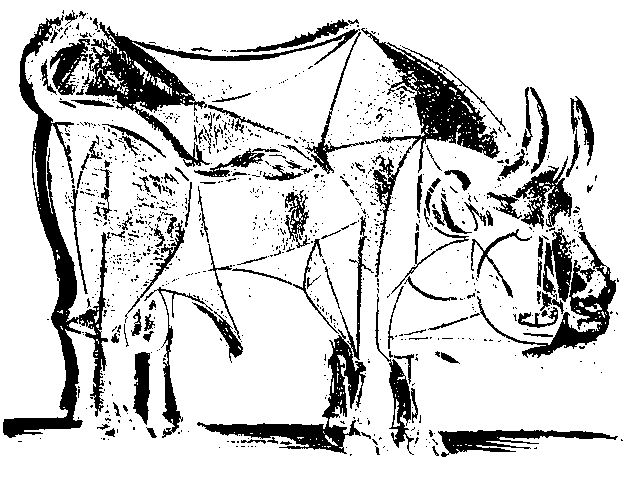

In [24]:
p3_deleted

From plate 4 to 5: during this transition the artist deletes certain regions (the back, part of the back leg,  the chin and the abdomen). This transformation can be achieved by performing opening to divide the regions, then labeling them and erasing selected elements by applying several consecutive erosions and dilations. Horns have also gone through change, they have been simplified and made symmetric. This can be achieved by copying and reflecting one of the  The change in binary mask looks like the following:

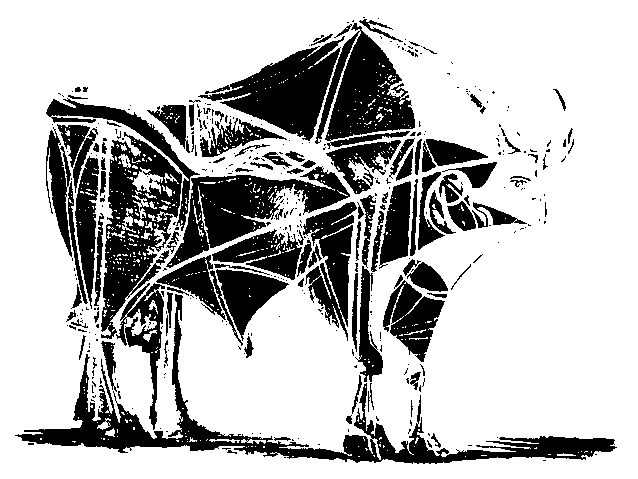

In [25]:
iunchanged4 = ibp4 & ibp5
ideleted4= ibp4 & cv2.bitwise_not(ibp5)
iadded4 = cv2.bitwise_not(ibp4) & ibp5

p4_unchanged = Image.fromarray(np.uint8(cv2.bitwise_not(iunchanged4)))
p4_deleted = Image.fromarray(np.uint8(cv2.bitwise_not(ideleted4)))
p4_added = Image.fromarray(np.uint8(cv2.bitwise_not(iadded4)))
p4_unchanged

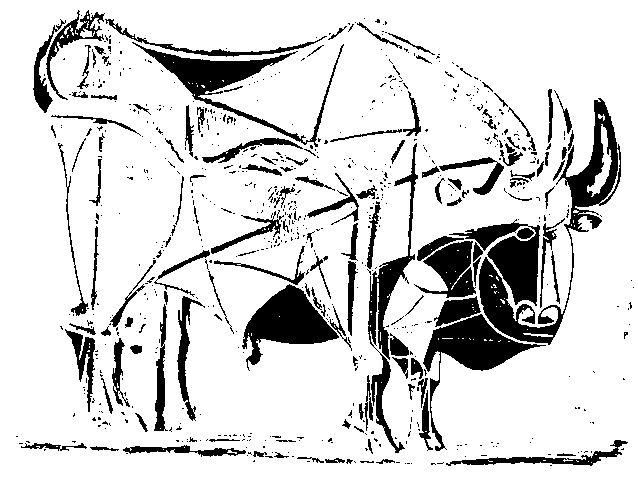

In [26]:
p4_deleted

Plate 5 to 6: this is where the artist plays with balance and symmetry. First, he flips the tail symmetrically over some diagonal line going through the back part of the bull. Next, he erases part of back and abdomen to keep the horizontal symmetry. Another change affects the legs:the back legs have become two lines. This transformation can be applied by using thinning/skeletonization that has been defined above. The front legs are still bulky and now the left leg is also symmetric along the vertical line going throughout the torso. Artist also gets rid of the abdomen, as to keep the diagonal symmetry in place. Head also undergoes major changes. The face is completely deleted, instead the head is elevated in such a way that it mirrors the position of the tale. These changes can be tracked by identifying eccentricity and the length of the tail and applying similar characteristics to the head as well.

Plate 6 to 7: in this case artist seems to build some sort of bounding boxes surrounding the bull. He connects the curvature of the tail with a straight line. Next, he completely removes two legs and builds bounding boxes around the other two. The final box is build around the torso and the head. Pelvic area is also elevated to fit the box. Computationally, the transformation can be replicated in the similar way: by building bounding boxes and erasing extra parts.

Plate 7 to 8: this transformation is the most ambigious one. The tail is rotated in such a way that it has become full ellipse. Next a straight line goes from the hip and connects to the tail. The lines that were the legs are now twisted.

Plate 8 to 9: here the artist removes excessive black coloring and continues the work with contours only. This transformation can either be applied by opening or by detecting the edges/contours and extracting them. Certain straight lines become curvy (e.g. back part). Also, several lines from the face are erased to keep the image balanced in terms of symmetry and to mirror the shape of the tail. Here once again those characteristics can be described in terms of the eccentricity of the shapes. Horns are also simplified. Can be implemented by using skeletonization

Plate 9 to 10: in this tuple the tail is removed and the back part of the leg serves as the new tail. Several lines constituting to the head are removed, horns are transferred to the top of the head. Legs are simplified to single lines. These transformations can be replicated region-wise.

Plate 10 to 11: in the final transformation the inner lines are removed. This can be achieved by either using opening or extracting the contours. Facial features are discarded completely and now the torso directly connects to the head. All of the shapes are simplified as much as possible. The tail is again reflected along the line that connects bulls torso with the end of the tail. All of the above mentioned transformations can be replicated region-wise. The tail part in this and previous transformations can be implemented by using concepts of orientation, eccentricity and moment preservation.

# Trying the described transformations

Attempt without skeletonization:

In [606]:
plate8 = ibp8.copy()

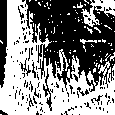

In [607]:
roi = plate8[125:240, 185:300]
Image.fromarray(np.uint8((cv2.bitwise_not(roi))))

In [608]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
plate8[125:240, 185:300] = cv2.erode(plate8[125:240, 185:300], kernel,iterations = 10)
plate8[110:150, 200:250] = cv2.erode(plate8[110:150, 200:250], kernel,iterations = 10)
plate8[113:150, 250:273] = cv2.erode(plate8[113:150, 250:273], kernel,iterations = 10)
plate8[143:220, 300:330] = cv2.erode(plate8[143:220, 300:330], kernel,iterations = 10)
plate8[165:203, 330:350] = cv2.erode(plate8[165:203, 330:350], kernel,iterations = 10)
plate8[95:120,180:230] = cv2.erode(plate8[95:120,180:230], kernel,iterations = 10)
plate8[101:200,150:200] = cv2.erode(plate8[101:200,150:200], kernel,iterations = 10)
plate8[185:215,160:200] = cv2.erode(plate8[185:215,160:200], kernel,iterations = 10)
plate8[115:150,120:200] = cv2.erode(plate8[115:150,120:200], kernel,iterations = 10)
plate8[120:150,100:200] = cv2.erode(plate8[120:150,100:200], kernel,iterations = 10)
plate8[145:175,128:150] = cv2.erode(plate8[145:175,128:150], kernel,iterations = 10)
plate8[175:190,140:200] = cv2.erode(plate8[175:190,140:200], kernel,iterations = 10)

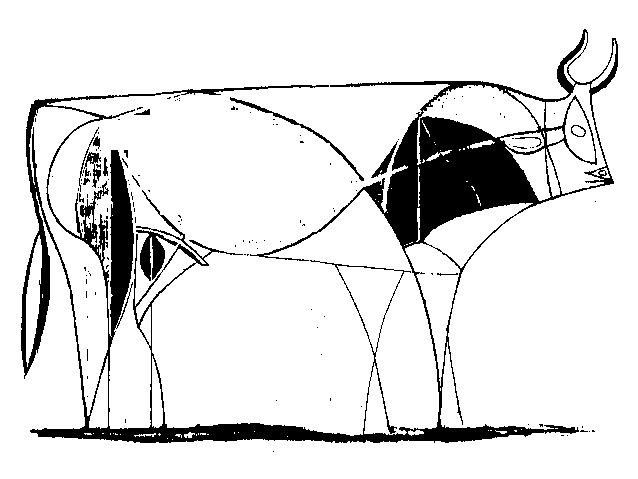

In [609]:
Image.fromarray(np.uint8((cv2.bitwise_not(plate8))))

Similar operations can be performed on the rest of the body. Attempt the same operations on a version processed by thinning:

In [610]:
plate8 = ibp8.copy()

In [611]:
size = np.size(plate8)
skel8 = np.zeros(plate8.shape,np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while(not done):
    eroded = cv2.erode(plate8,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(plate8,temp)
    skel8 = cv2.bitwise_or(skel8,temp)
    plate8 = eroded.copy()
 
    zeros = size - cv2.countNonZero(plate8)
    if zeros==size:
        done = True

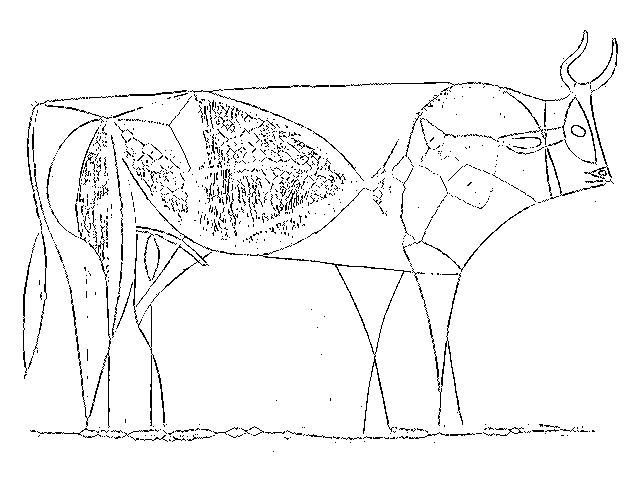

In [613]:
Image.fromarray(np.uint8(cv2.bitwise_not(skel8)))

In [617]:
plate8 = skel8

In [796]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
morph = cv2.dilate(plate8, kernel,iterations = 1)
#morph = cv2.morphologyEx(plate8, cv2.MORPH_CLOSE, kernel)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
morph = cv2.erode(morph, kernel,iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
#morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
morph = cv2.dilate(morph, kernel,iterations = 1)
morph = cv2.erode(morph, kernel,iterations = 1)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph[125:240, 185:300] = cv2.erode(morph[125:240, 185:300], kernel,iterations = 3)
morph[110:150, 200:250] = cv2.erode(morph[110:150, 200:250], kernel,iterations = 3)
morph[113:150, 250:273] = cv2.erode(morph[113:150, 250:273], kernel,iterations = 3)
morph[143:220, 300:330] = cv2.erode(morph[143:220, 300:330], kernel,iterations = 3)
morph[165:203, 330:350] = cv2.erode(morph[165:203, 330:350], kernel,iterations = 3)
morph[95:120,180:230] = cv2.erode(morph[95:120,180:230], kernel,iterations = 3)
morph[101:200,150:200] = cv2.erode(morph[101:200,150:200], kernel,iterations = 3)
morph[115:150,120:200] = cv2.erode(morph[115:150,120:200], kernel,iterations = 3)
morph[135:232,70:110] = cv2.erode(morph[135:232,70:110], kernel,iterations = 3)
morph[230:260,100:110] = cv2.erode(morph[230:260,100:110], kernel,iterations = 3)
morph[232:240, 75:100] = cv2.erode(morph[232:240, 75:100], kernel,iterations = 3)
morph[100:300, 598:650] = cv2.erode(morph[100:300, 598:650], kernel,iterations = 3)
morph[92:132, 592:650] = cv2.erode(morph[92:132, 592:650], kernel,iterations = 3)
morph[170:185, 580:650] = cv2.erode(morph[170:185, 580:650], kernel,iterations = 3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
morph = cv2.dilate(morph, kernel,iterations = 1)
morph = cv2.erode(morph, kernel,iterations = 1)
morph = cv2.dilate(morph, kernel,iterations = 1)


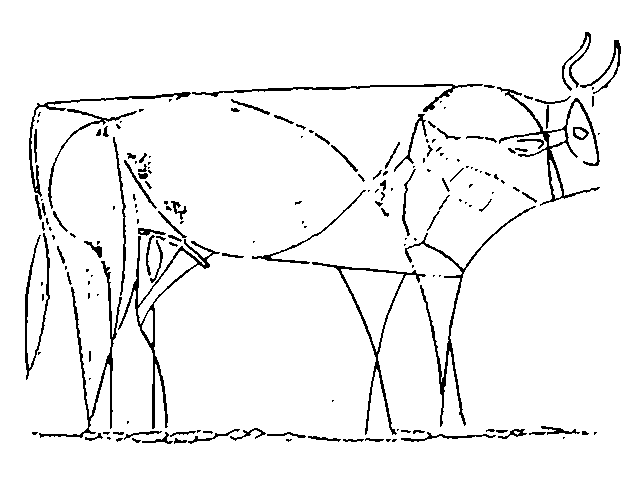

In [790]:
Image.fromarray(np.uint8(cv2.bitwise_not(morph)))

In order to fix the head, rotate the part of the neck, using a function for rotation

In [791]:
def subimage(image, center, theta, width, height):
    shape = (image.shape[1], image.shape[0])

    matrix = cv2.getRotationMatrix2D(center=center, angle=theta, scale=1)
    image = cv2.warpAffine(src=image, M=matrix, dsize=shape)

    x = int(center[0] - width/2 )
    y = int(center[1] - height/2)

    image = image[y:y+height, x:x+width]

    return image

In [792]:
morph2 = subimage(morph, center=(582, 192), theta=30, width=16, height=36)
Image.fromarray(np.uint8((cv2.bitwise_not(morph2))))

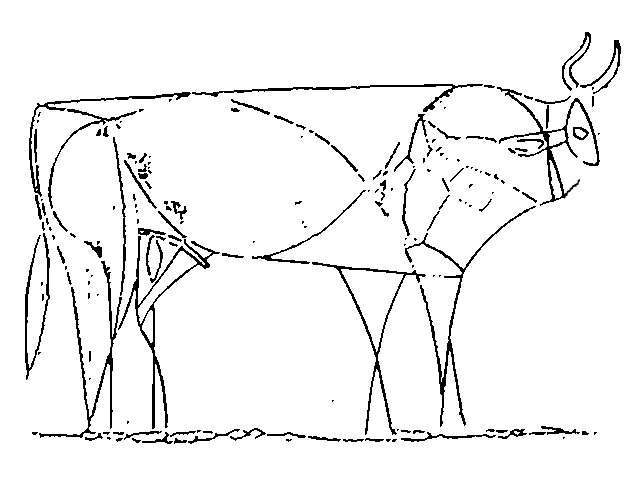

In [797]:
morph[184:200, 564:600] = cv2.erode(morph[184:200, 564:600], kernel,iterations = 3)
morph[184:200, 564:600] = cv2.erode(morph[184:200, 564:600], kernel,iterations = 3)
morph[170:206, 564:580] = morph2
Image.fromarray(np.uint8(cv2.bitwise_not(morph)))

In [798]:
roi = morph[235:280, 140:163]
Image.fromarray(np.uint8((cv2.bitwise_not(roi))))

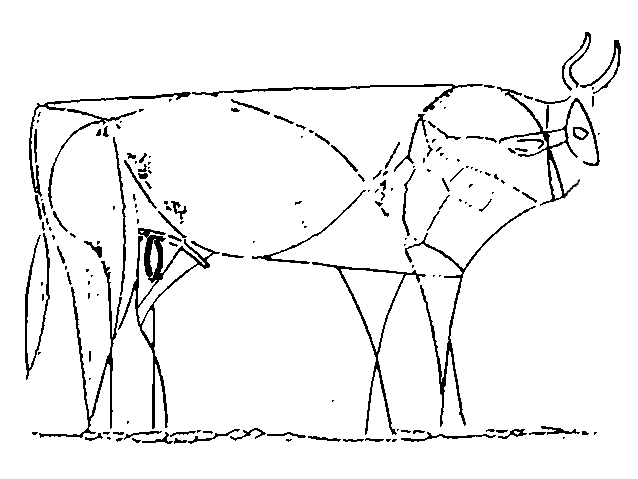

In [800]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 2))
morph[235:280, 140:163] = cv2.dilate(morph[235:280, 140:163], kernel,iterations = 2)
Image.fromarray(np.uint8(cv2.bitwise_not(morph)))

After comparing this to the original by using the above mentioned method of combining binary masks using logical operations, one can notice that this replica has much more noise and different artifacts. Another thing that hasn't been changed is the ellipsoid-like shape near the hip. That can be done by extracting the tail end, rotating and scaling it and combining with bulls hip.